The aim of this project to analyze the medical factors of a patient such as Glucose Level, Blood Pressure, Skin Thickness, Insulin Level and many others to predict whether the patient has diabetes or not.

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
df = pd.read_csv(r"C:\Users\sonia\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing


In [7]:

#shape of the dataset
df.shape

(768, 9)

In [9]:
#checking unique values
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(df[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In [11]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Now, I have count of incoorect values in the variables, I will be replacing these values

Replacing the 0 value in the variables - Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [14]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

In [16]:
#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


# Checking for missing values

In [19]:

#missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
# Descriptive Statistics
#checking descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# Exploratory Data Analysis

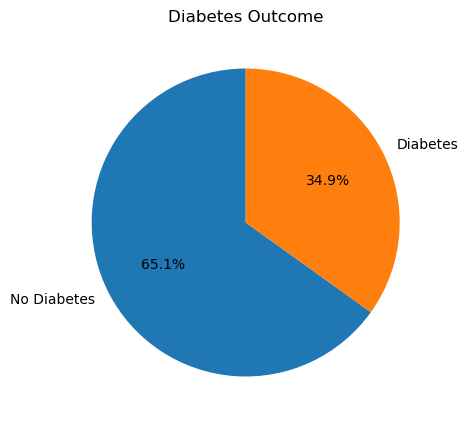

In [26]:
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

# Age Distribution and Diabetes

C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


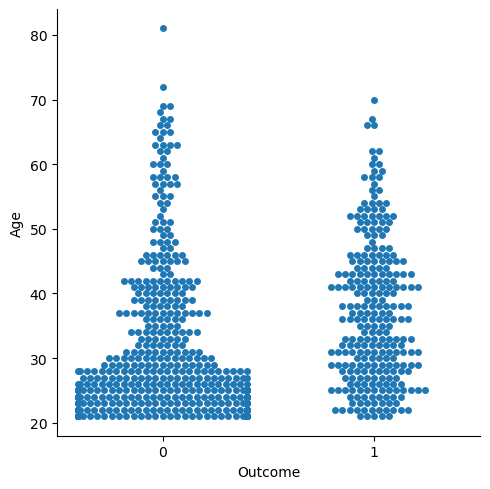

In [29]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

# Pregnancies and Diabetes

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

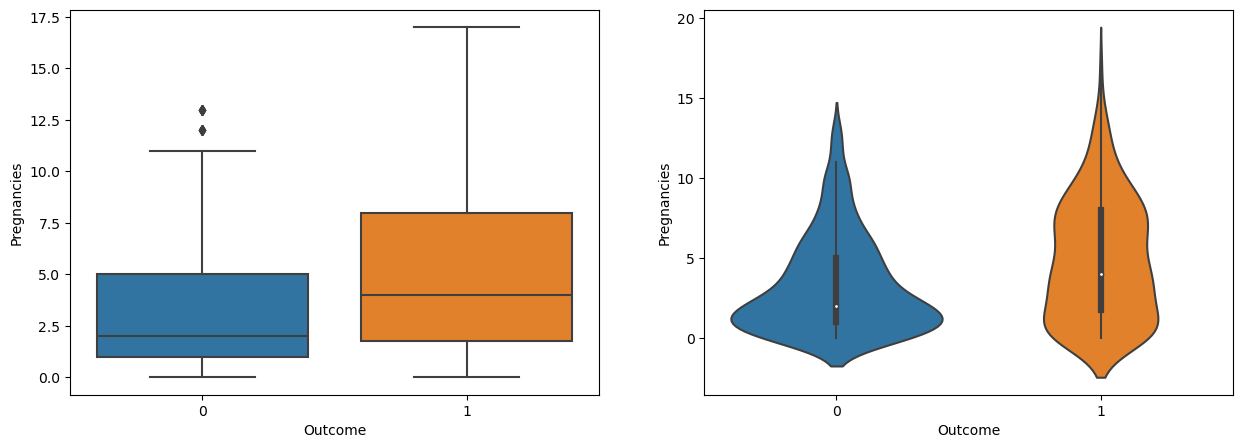

In [34]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1])

# Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs Diabetes')

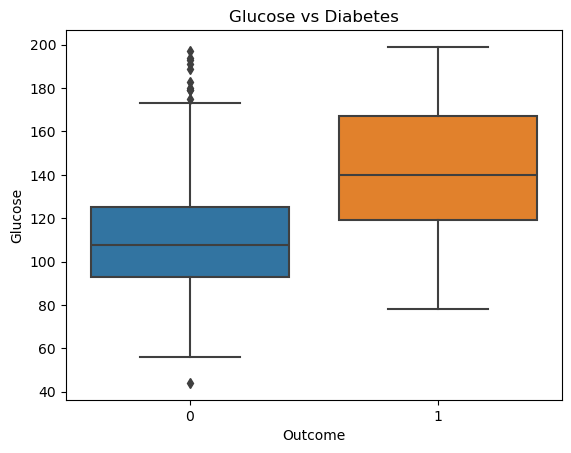

In [37]:
sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

# Blood Pressuse and Diabetes

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

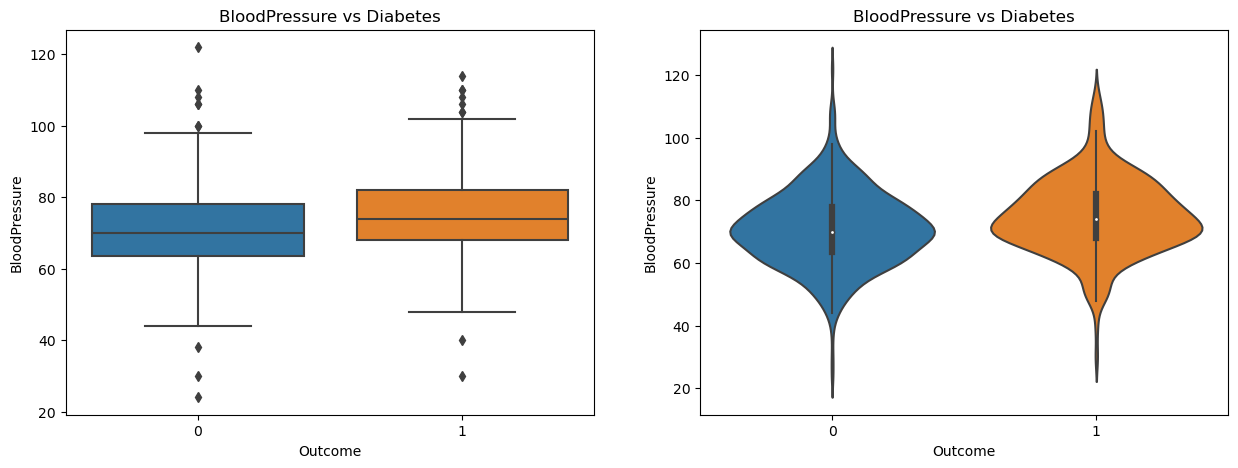

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes')

# Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

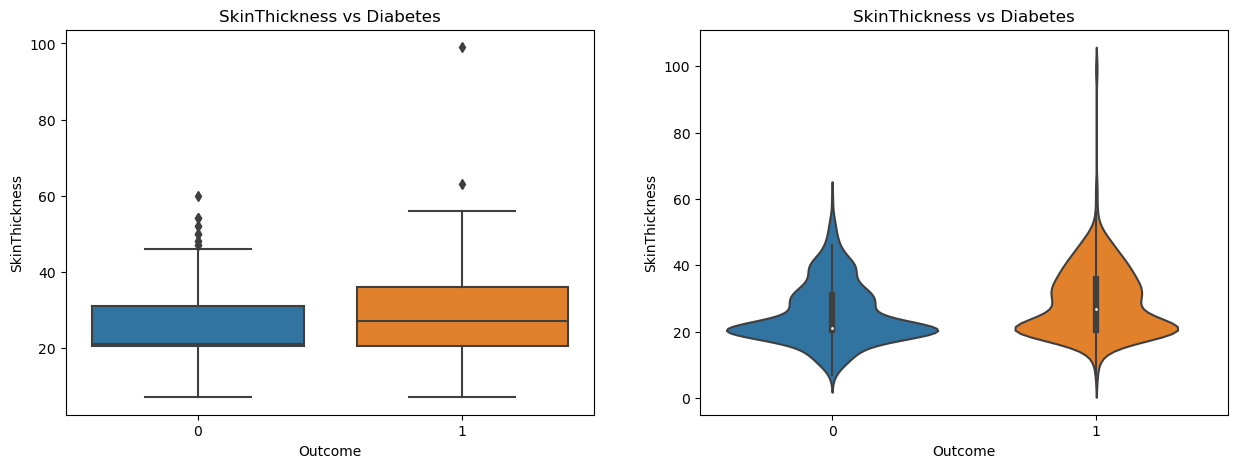

In [43]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=df,ax=ax[1]).set_title('SkinThickness vs Diabetes')

# Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

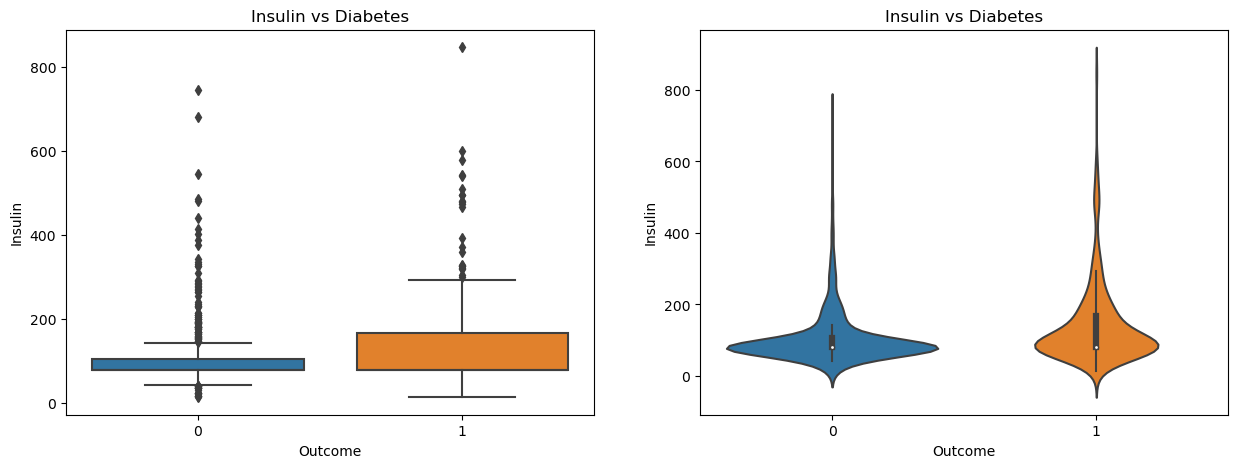

In [46]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Insulin',data=df,ax=ax[0]).set_title('Insulin vs Diabetes')
sns.violinplot(x='Outcome',y='Insulin',data=df,ax=ax[1]).set_title('Insulin vs Diabetes')

# BMI and Diabetes

<Axes: xlabel='Outcome', ylabel='BMI'>

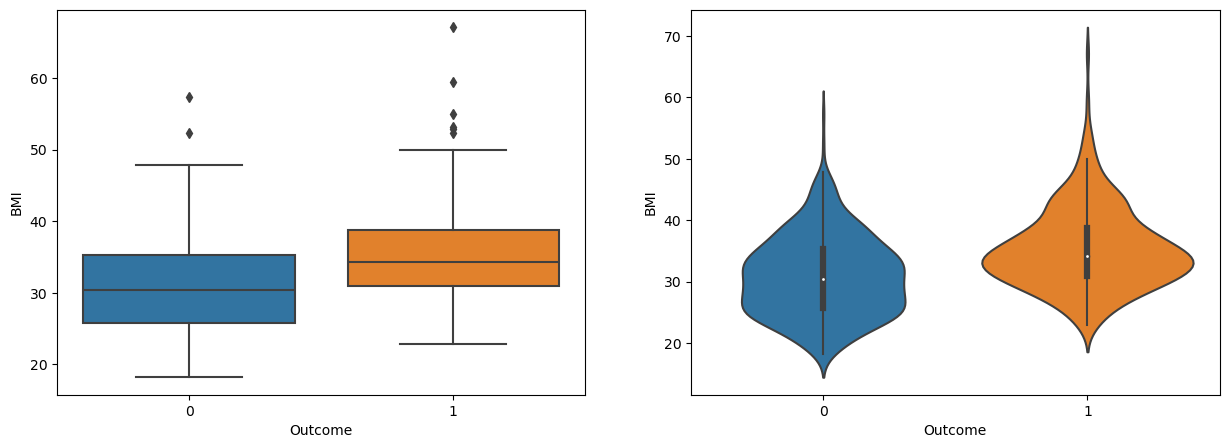

In [49]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='BMI',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='BMI',data=df,ax=ax[1])

# Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function')

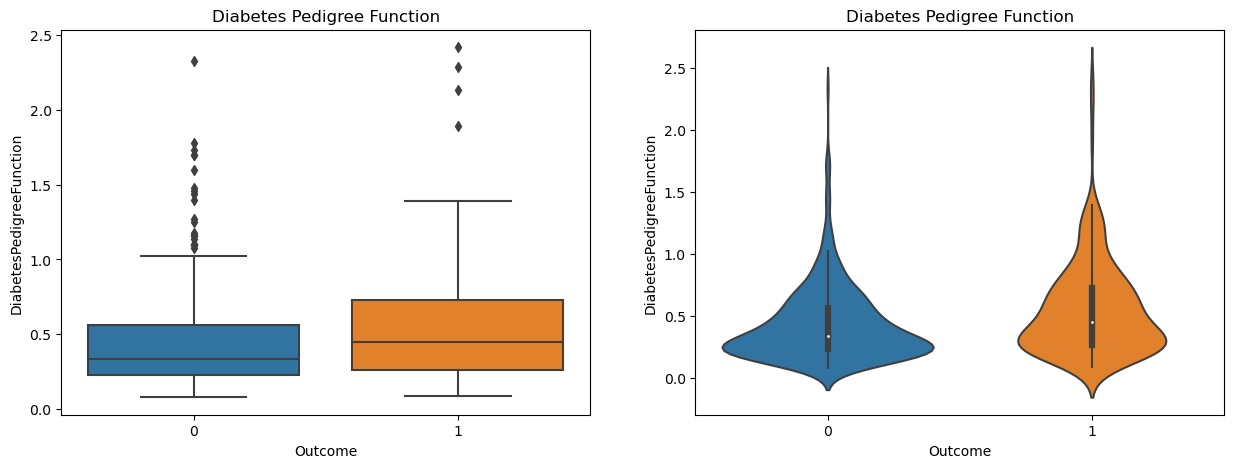

In [52]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[0]).set_title('Diabetes Pedigree Function')
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[1]).set_title('Diabetes Pedigree Function')

# Coorelation Matrix Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

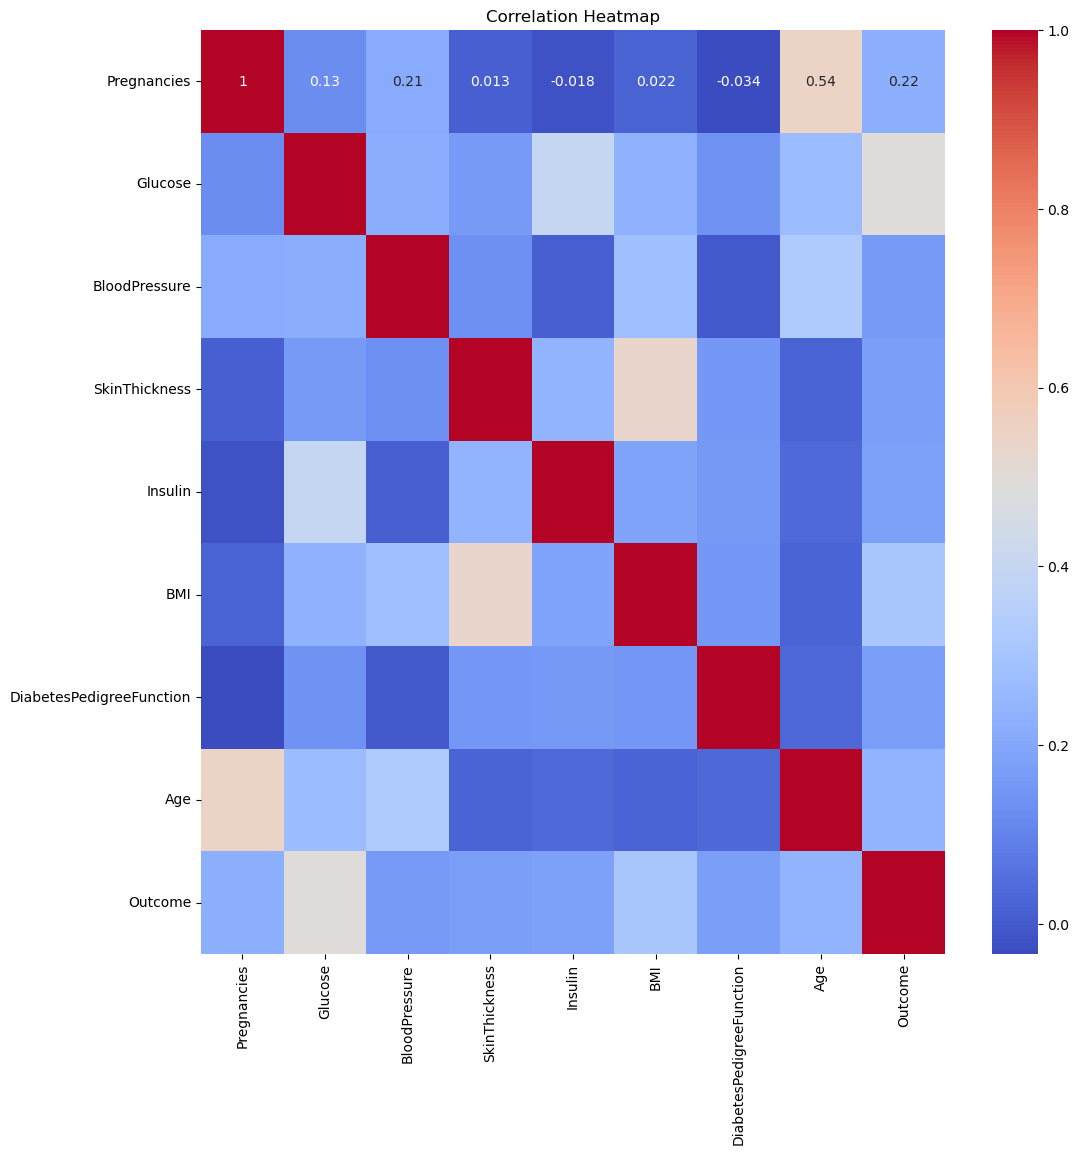

In [55]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

In [57]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

In [59]:

# Diabetes Prediction
# Logistic Regression
#building model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr


LogisticRegression()

In [61]:
#training the model
lr.fit(X_train,y_train)
#training accuracy
lr.score(X_train,y_train)

C:\Users\sonia\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7719869706840391

In [63]:
#predicted outcomes
lr_pred = lr.predict(X_test)

# Random Forest Classifier

In [66]:
#buidling model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [68]:
#training model
rfc.fit(X_train, y_train)
#training accuracy
rfc.score(X_train, y_train)

1.0

In [70]:
#training model
rfc.fit(X_train, y_train)
#training accuracy
rfc.score(X_train, y_train)

1.0

In [72]:
#predicted outcomes
rfc_pred = rfc.predict(X_test)

# Support Vector Machine (SVM)

In [75]:
#building model
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm

SVC(kernel='linear', random_state=0)

In [77]:
#training the model
svm.fit(X_train, y_train)
#training the model
svm.score(X_test, y_test)

0.7597402597402597

In [79]:
#predicting outcomes
svm_pred = svm.predict(X_test)



# Model Evaluation
# Evaluating Logistic Regression Model
# Confusion Matrix Heatmap

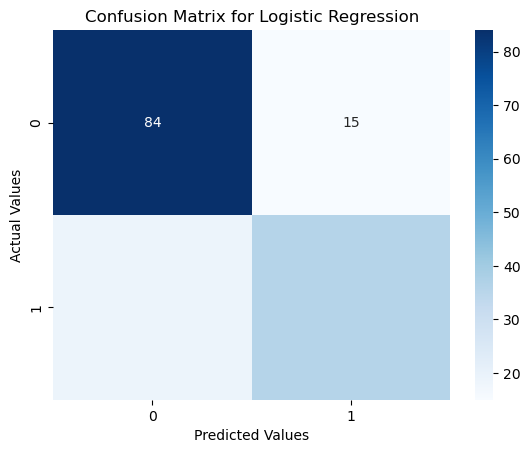

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Distribution plot

C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\2460762733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\2460762733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

Text(0, 0.5, 'Count')

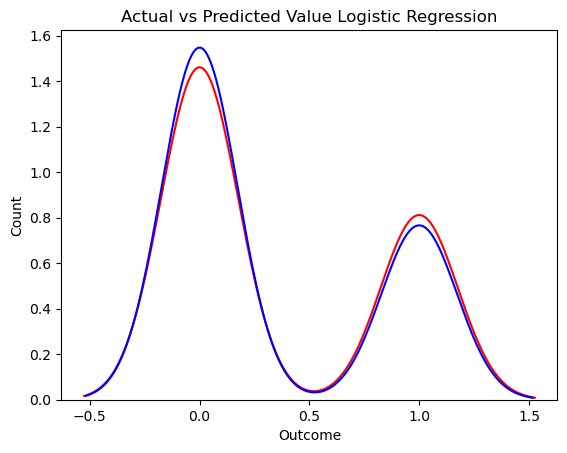

In [85]:
ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(lr_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [87]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [89]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('Accuracy Score: ',accuracy_score(y_test,lr_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,lr_pred))
print('R2 Score: ',r2_score(y_test,lr_pred))

Accuracy Score:  0.7792207792207793
Mean Absolute Error:  0.22077922077922077
Mean Squared Error:  0.22077922077922077
R2 Score:  0.038383838383838076


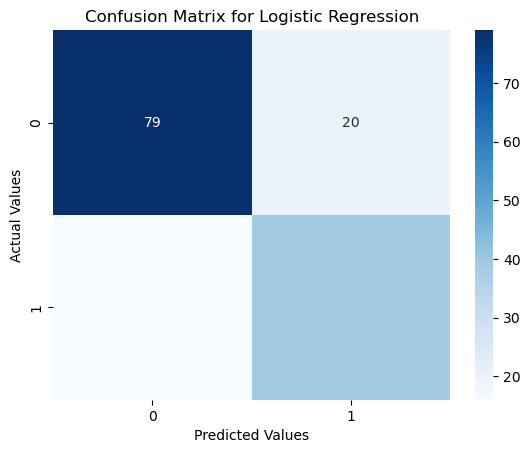

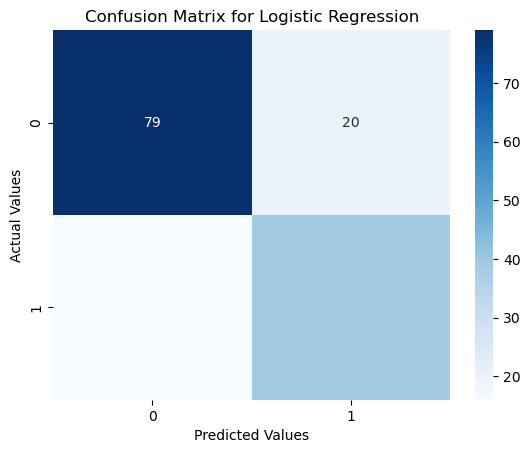

In [91]:
# Evaluating Random Forest Classifier

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\1073637092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\1073637092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

Text(0, 0.5, 'Count')

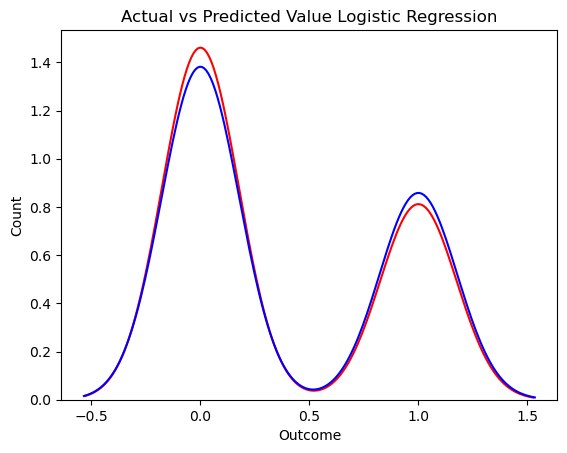

In [95]:
# Distribution Plot

ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(rfc_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [97]:
# Classification Report

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [99]:
print('Accuracy Score: ',accuracy_score(y_test,rfc_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rfc_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,rfc_pred))
print('R2 Score: ',r2_score(y_test,rfc_pred))

Accuracy Score:  0.7662337662337663
Mean Absolute Error:  0.23376623376623376
Mean Squared Error:  0.23376623376623376
R2 Score:  -0.01818181818181852


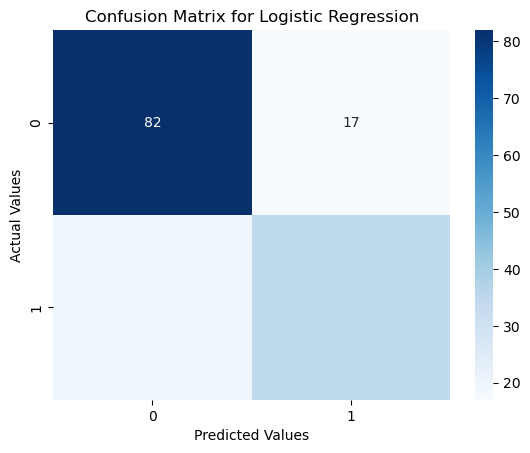

In [105]:
# Evaluating SVM Model
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\1949624111.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\AppData\Local\Temp\ipykernel_19360\1949624111.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

Text(0.5, 0, 'Outcome')

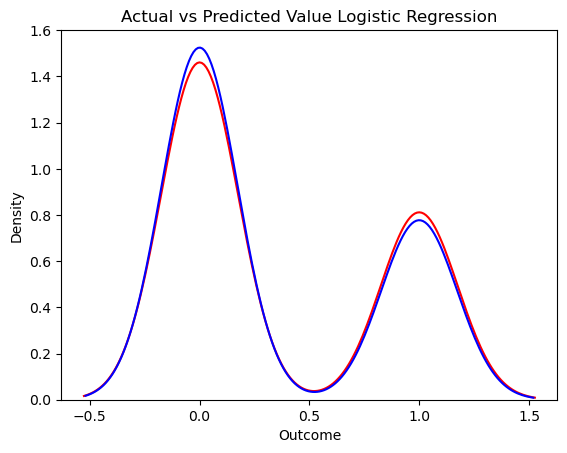

In [107]:
# Distribution Plot

ax = sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(svm_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')

# Classification Report

In [110]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [112]:
print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,svm_pred))
print('R2 Score: ',r2_score(y_test,svm_pred))

Accuracy Score:  0.7597402597402597
Mean Absolute Error:  0.24025974025974026
Mean Squared Error:  0.24025974025974026
R2 Score:  -0.046464646464646764


# Comparing the models

C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Comparison of different models')

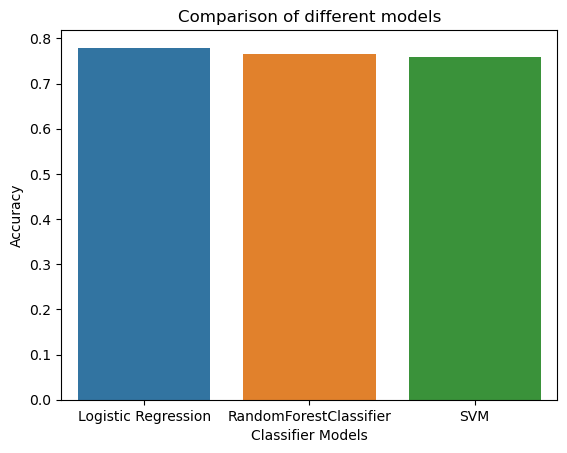

In [115]:
#comparing the accuracy of different models
sns.barplot(x=['Logistic Regression', 'RandomForestClassifier', 'SVM'], y=[0.7792207792207793,0.7662337662337663,0.7597402597402597])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

# Conclusion

Coming to the classification models, Logistic Regression outperformed Random Forest and SVM with 78% accuracy. The accuracy of the model can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 768 rows.